In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2

%matplotlib inline 

In [3]:
data=pd.read_csv('music.csv',index_col=False)

In [4]:
data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [5]:
data.isnull().any()

age       False
gender    False
genre     False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [7]:
data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [8]:
data.shape

(18, 3)

In [9]:
data.nunique()

age       13
gender     2
genre      5
dtype: int64

In [10]:
dataset=data

In [11]:
data = pd.get_dummies(data, columns=['gender'])
print(data.head())

   age   genre  gender_0  gender_1
0   20  HipHop         0         1
1   23  HipHop         0         1
2   25  HipHop         0         1
3   26    Jazz         0         1
4   29    Jazz         0         1


In [12]:
data.rename(columns={'gender_0':'Female', 'gender_1':'Male'},inplace=True)

In [13]:
data

,age,genre,Female,Male
0,20,HipHop,0,1
1,23,HipHop,0,1
2,25,HipHop,0,1
3,26,Jazz,0,1
4,29,Jazz,0,1
5,30,Jazz,0,1
6,31,Classical,0,1
7,33,Classical,0,1
8,37,Classical,0,1
9,20,Dance,1,0


In [14]:
y=data['genre']

In [15]:
x=data.drop(['genre'], axis=1)

In [16]:
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [17]:
labels=['HipHop','Jazz','Classical','Dance','Acoustic']

In [18]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

y=array(y)
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
print(y)

[3 3 3 4 4 4 1 1 1 2 2 2 0 0 0 1 1 1]


In [19]:
y=pd.Series(y)

In [20]:
type(y)

pandas.core.series.Series

In [21]:
x

,age,Female,Male
0,20,0,1
1,23,0,1
2,25,0,1
3,26,0,1
4,29,0,1
5,30,0,1
6,31,0,1
7,33,0,1
8,37,0,1
9,20,1,0


C:\Users\Richa\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


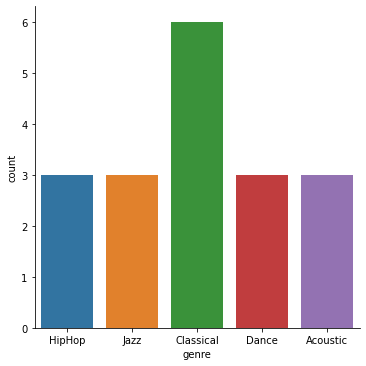

In [22]:
sns.factorplot('genre', data=data, kind='count')

C:\Users\Richa\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


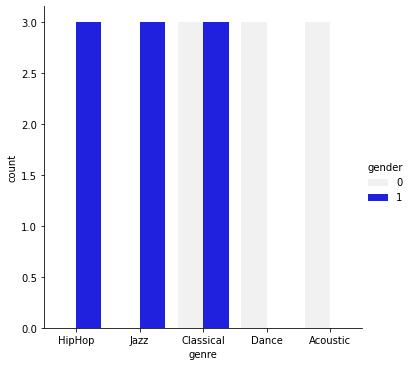

In [23]:
sns.factorplot('genre', data=dataset, kind='count', hue='gender', color='blue')

C:\Users\Richa\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


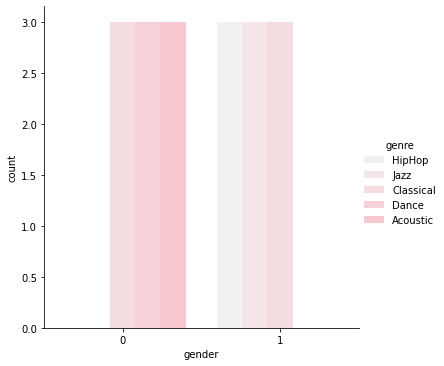

In [24]:
sns.factorplot('gender', data=dataset, kind='count', hue='genre', color='pink')

C:\Users\Richa\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


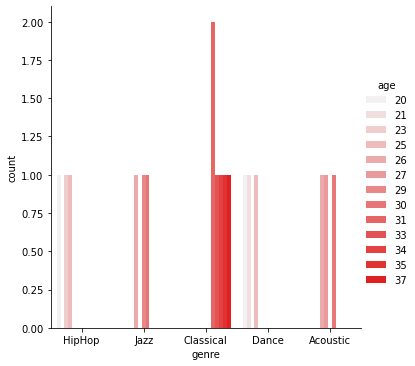

In [25]:
sns.factorplot('genre', data=dataset, kind='count', hue='age', color='red')

C:\Users\Richa\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


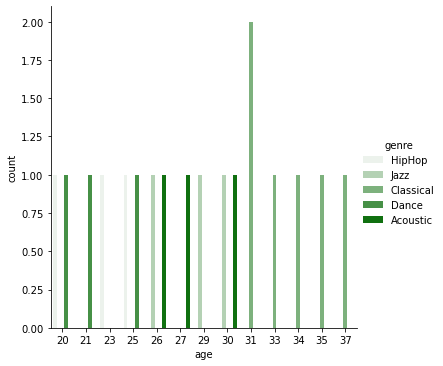

In [26]:
sns.factorplot('age', data=dataset, kind='count', hue='genre', color='green')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, shuffle=True, random_state=42)

In [29]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [30]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
test_predict=model.predict(x_test)
test_accuracy=accuracy_score(y_test, test_predict)

In [31]:
round(test_accuracy*100,2)

100.0

In [32]:
type(x_test)

pandas.core.frame.DataFrame

# Prediciton

In [34]:
a=int(input())
print("Enter Sex as 'M or 'F' ")
sex=input()


0
Enter Sex as 'M or 'F' 
M


In [35]:
if (sex=='M'):
    input_data={'age':[a],'Male':[1],'Female':[0]}
else :
    input_data={'age':[a],'Male':[0],'Female':[1]}

input_data=pd.DataFrame(input_data)

In [36]:
prediction=model.predict(input_data)

In [37]:
print(labels[prediction[0]])

Classical
